# Práctica V.I.D.A. - Python

Autor: Alexis Gómez Chimeno

Grado: MAIS 5ºA

## Objetivo de la práctica

El objetivo de la práctica es comprender mediante visualizaciones ciertas características de los cuerpos celestiales / estrellas de la vía Láctea.

La información fuente de las medidas ha sido descargada de archivos .fits, esta se puede encontrar en los siguientes enlaces para las 2 fuentes de datos necesarias:
1. [SDSS ESPECTRO INFRARROJO](https://live-sdss4org-dr16.pantheonsite.io/).
2. [SDSS ESPECTRO ÓPTICO](https://live-sdss4org-dr16.pantheonsite.io/spectro/).

Los datasets que se utilizan han sido preprocesados mediante los jupyter notebooks de preprocesado especificados en el siguiente repositorio: [Github](https://github.com/guillermoayllon/AIstrophysics?tab=readme-ov-file). Para evitar tener datos en exceso, se ha modificado la cantidad extraída ajustando el número de elementos a procesar. Asimismo, se trabaja con dos formatos de archivos por simples motivos ilustrativos (.csv y .parquet).


## Fuente de análisis 1

El preprocesamiento nos permite conocer las siguiente medidas normalizadas para el espectro infrarrojo:
 - Metalicidad (ratio entre el número de átomos de hierro y de hidrógeno de una estrella medida contra los del sol) en escala logarítmica.
 - Temperatura efectiva medida en grados kelvin.
 - Tipo de espectro.
 - Gravedad de la superficie en unidades CGS en escala logarítmica \[cm^2/s\].
 - Densidad de flujo espectral \[erg/s/cm^2\]. En este caso, cada columna corresponde a la longitud de onda en la que se mide en Amstrongs \[Å\]. Asimismo, erg representa unidades de energía en la escala CGS.

En base a esto, se trata de responder a varias preguntas sobre la relación de estas variables, así como de analizar qué estrellas son más características que otras.

Por supuesto, estas relaciones pueden ser explicadas mediante conocimientos de astrofísica, pero solo se trabaja con las relaciones que aporten los datos.

### 1. Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

### 2. Lectura de datos preprocesados

In [2]:
df=pd.read_csv('data_IR_clean.csv',sep=",",header=0, index_col=0)
df.reset_index(inplace=True, drop=True)
df

,ID,Fe/H,T,Spec_Type,logG,83,84,85,86,87,...,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779
0,VESTA,-0.001886,5711.6045,GKd_b,4.400497,1.015483,1.016913,1.015243,1.012190,1.017303,...,1.003473,0.998570,0.995761,0.994430,0.992546,0.985805,0.981029,0.995643,0.999659,0.332198
1,2M00000002+7417074,-0.165732,3723.2263,Mg_d,0.754881,0.836298,1.099120,1.137067,1.104683,1.059847,...,1.090183,1.036540,1.024917,1.010116,1.088517,1.039353,1.029940,1.077410,1.098370,0.350630
2,2M00000019-1924498,-0.285279,5508.8604,GKd_b,4.305899,1.009840,1.012070,1.013673,1.001481,1.008623,...,0.986659,0.977409,0.984393,0.982385,0.980970,0.979384,0.974866,0.983997,0.980578,0.328929
3,2M00000032+5737103,-0.168239,6318.0450,Fd_d,3.857439,0.999723,1.007480,1.006660,1.012470,1.013023,...,0.978168,0.980381,0.975771,0.970371,0.973343,0.968076,0.969564,0.974159,0.975089,0.324621
4,2M00000032+5737103,-0.178222,6285.9190,Fd_a,3.836661,0.999723,1.007480,1.006660,1.012470,1.013023,...,0.978168,0.980381,0.975771,0.970371,0.973343,0.968076,0.969564,0.974159,0.975089,0.324621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2M00120352+0027343,-0.009210,4145.9110,GKd_c,4.833498,0.949363,1.043430,1.037453,1.037070,1.049560,...,1.021063,1.013827,1.023354,0.945683,1.040175,0.995069,0.978083,0.970490,1.035123,0.342753
1859,2M00120365+6739517,-0.154772,4393.4810,GKg_c,1.879430,0.984075,1.084473,1.081300,1.041453,1.052023,...,1.023353,1.047461,1.033043,0.991213,1.031590,0.996914,0.962708,1.020064,1.013335,0.339503
1860,2M00120404+6841563,-0.247072,3963.8252,Mg_b,0.983119,0.886091,1.088987,1.138223,1.089767,1.064100,...,1.060090,1.031760,1.020087,1.003947,1.053567,1.008514,0.997240,1.042247,1.060603,0.341763
1861,2M00120441+7524270,-0.261182,4863.9480,GKg_b,2.793930,1.009790,1.090423,1.068967,1.043410,1.027727,...,1.029657,1.005986,0.967468,0.974507,0.987544,0.978252,0.981916,0.984489,0.998972,0.330753


## Tipos de espectro

La nomenclatura que sigue el tipo de espectro no coincide con la clasificación de Morgan-Keenan para estrellas.

Se puede encontrar las definiciones exactas que se utilizan siguiendo la convención `APOGEE Stellar Parameters and Chemical Abundances Pipeline (ASPCAP)`: [ASPCAP REF](https://www.sdss4.org/dr17/irspec/parameters/)



In [3]:
df['Spec_Type'].unique()

array(['GKd_b', 'Mg_d', 'Fd_d', 'Fd_a', 'GKg_a', 'GKg_c', 'GKd_c', 'Mg_c',
       'GKg_b', 'Mg_b', 'GKg_d', 'Fd_b', 'Md_c', 'GKd_a', 'Mg_a', 'Md_b',
       'GKd_d', 'Fd_c', 'Md_d', 'Md_a'], dtype=object)

## Longitudes de onda disponibles

In [4]:
df['1200']

0       1.088797
1       1.087390
2       1.074393
3       1.118230
4       1.118230
          ...   
1858    0.000000
1859    1.145960
1860    1.131933
1861    1.136037
1862    0.000000
Name: 1200, Length: 1863, dtype: float64

## Estilos a utilizar en matplotlib

In [5]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.titlesize']='large'
plt.rcParams['axes.labelsize']='medium'
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']='Verdana'

## Pregunta 1 - ¿En el espectro ultravioleta de baja longitud, hay alguna relación entre la temperatura y la densidad de flujo para estrellas con alta o baja metalicidad?

Para resolver esta pregunta, primero debemos escoger una longitud de onda perteneciente al espectro ultravioleta de baja lontigud, esto es un valor $\lambda \in$ \[1000,1500\].

Por simplicidad, escogemos $\lambda = 1200$.

Para este tipo de gráfico, podemos hacer una visualización en tres dimensiones:
 1. El eje X representa la temperatura.
 2. El eje Y representa la densidad de flujo.
 3. Cada estrella se le asigna un tamaño según su grado de metalicidad.


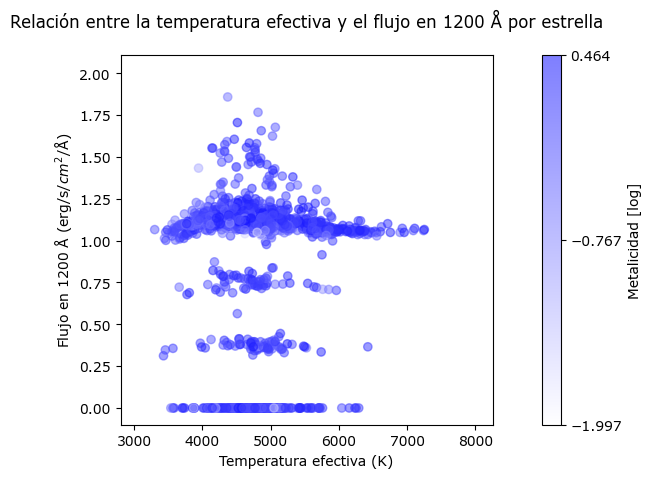

In [6]:
x = df['T']
y = df['1200']
c= df['Fe/H']
vmin=df['Fe/H'].min()
vmax=df['Fe/H'].max()
cmap = LinearSegmentedColormap.from_list('metallicity', ['w', 'b'])
names = df['ID']
plt.scatter(x, y, c=c, cmap=cmap, alpha=0.5)
plt.colorbar(label='Metalicidad [log]', orientation='vertical', pad=0.1, aspect=20, ticks=[vmin, (vmin+vmax)/2,vmax])
plt.xlim(x.min()-500, x.max()+1000)
plt.ylim(y.min()-0.1, y.max()+0.25)
plt.xlabel('Temperatura efectiva (K)')
plt.ylabel(r'Flujo en 1200 Å (erg/s/$cm^{2}$/Å)')
plt.title('Relación entre la temperatura efectiva y el flujo en 1200 Å por estrella', loc='center', pad=20)
plt.show()



La densidad de flujo para las estrellas tanto de alta como de baja metalicidad está concentrada mayoritariamente entre los valores \[1,1.25\]. 

También se aprecia un concentración en las densidades de flujo más bajas. No obstante, no se aprecia ningún tipo de relación lineal o no lineal a medida que la temperatura de las estrellas son superiores ni para bajas ni altas metalicidades.

Se puede apreciar que sí existe algún valor ligeramente distinto a la tendencia, como son las estrellas de baja metalicidad con densidad de flujo cercana a 2.00 y la estrella con temperatura cercana a 6500K con densidad de flujo de 0.35 aproximadamente.

## Análisis de estrellas comparativamente distintas a las tendencias

Para analizar estas dos estrellas que presentan valores dispares, se pretende analizar la distribución de sus densidades de flujo para todas las longitudes de onda. Asimismo, se añade la estrella que presenta una mayor temperatura.

Esto se consigue mediante un diagrama de violín para ver las distribuciones en 3 dimensiones.
 1. El eje X representa la estrella analizada.
 2. El eje Y representa el valor de la densidad de flujo.
 3. El ancho del violín por escalas representa la concentración/densidad de valores.

 

In [7]:
exclude_columns=['ID','Fe/H','T','Spec_Type','logG']
columns_to_keep=[col for col in df.columns if col not in exclude_columns]
columns_to_keep

['83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 

In [8]:
x = df['T']
y = df['1200']
star1=df[df['1200']==y.max()]
stars2=df[df['1200']<0.5]
star2=stars2[stars2['T']==stars2['T'].max()]
star2
star_added=df[df['T']==x.max()]
star_added

,ID,Fe/H,T,Spec_Type,logG,83,84,85,86,87,...,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779
1605,2M00102704+7337035,0.141321,7252.624,Fd_c,3.896105,1.00807,1.005543,1.009583,1.005607,0.985479,...,0.959434,0.960282,0.96461,0.962396,0.962063,0.958284,0.953834,0.946331,0.952834,0.31639


In [9]:
arranged_distribution_star1=pd.melt(star1, id_vars=['ID'], value_vars=columns_to_keep, var_name='Wave_length',value_name='Density_flux')
arranged_distribution_star1

,ID,Wave_length,Density_flux
0,2M00070519+8629136,83,0.000000
1,2M00070519+8629136,84,1.065743
2,2M00070519+8629136,85,1.030122
3,2M00070519+8629136,86,1.053783
4,2M00070519+8629136,87,1.067467
...,...,...,...
2502,2M00070519+8629136,2775,1.019330
2503,2M00070519+8629136,2776,0.994512
2504,2M00070519+8629136,2777,0.994178
2505,2M00070519+8629136,2778,1.002271


In [10]:
arranged_distribution_star2=pd.melt(star2, id_vars=['ID'], value_vars=columns_to_keep, var_name='Wave_length',value_name='Density_flux')
arranged_distribution_star2

,ID,Wave_length,Density_flux
0,2M00051577-0003172,83,1.001078
1,2M00051577-0003172,84,1.009149
2,2M00051577-0003172,85,1.007703
3,2M00051577-0003172,86,1.005903
4,2M00051577-0003172,87,1.002799
...,...,...,...
2502,2M00051577-0003172,2775,0.976001
2503,2M00051577-0003172,2776,0.976296
2504,2M00051577-0003172,2777,0.979392
2505,2M00051577-0003172,2778,0.973283


In [11]:
arranged_distribution_star3=pd.melt(star_added, id_vars=['ID'], value_vars=columns_to_keep, var_name='Wave_length',value_name='Density_flux')
arranged_distribution_star3

,ID,Wave_length,Density_flux
0,2M00102704+7337035,83,1.008070
1,2M00102704+7337035,84,1.005543
2,2M00102704+7337035,85,1.009583
3,2M00102704+7337035,86,1.005607
4,2M00102704+7337035,87,0.985479
...,...,...,...
2502,2M00102704+7337035,2775,0.958284
2503,2M00102704+7337035,2776,0.953834
2504,2M00102704+7337035,2777,0.946331
2505,2M00102704+7337035,2778,0.952834


In [12]:
final_df=pd.concat([arranged_distribution_star1,arranged_distribution_star2,arranged_distribution_star3],ignore_index=True)
final_df

,ID,Wave_length,Density_flux
0,2M00070519+8629136,83,0.000000
1,2M00070519+8629136,84,1.065743
2,2M00070519+8629136,85,1.030122
3,2M00070519+8629136,86,1.053783
4,2M00070519+8629136,87,1.067467
...,...,...,...
7516,2M00102704+7337035,2775,0.958284
7517,2M00102704+7337035,2776,0.953834
7518,2M00102704+7337035,2777,0.946331
7519,2M00102704+7337035,2778,0.952834


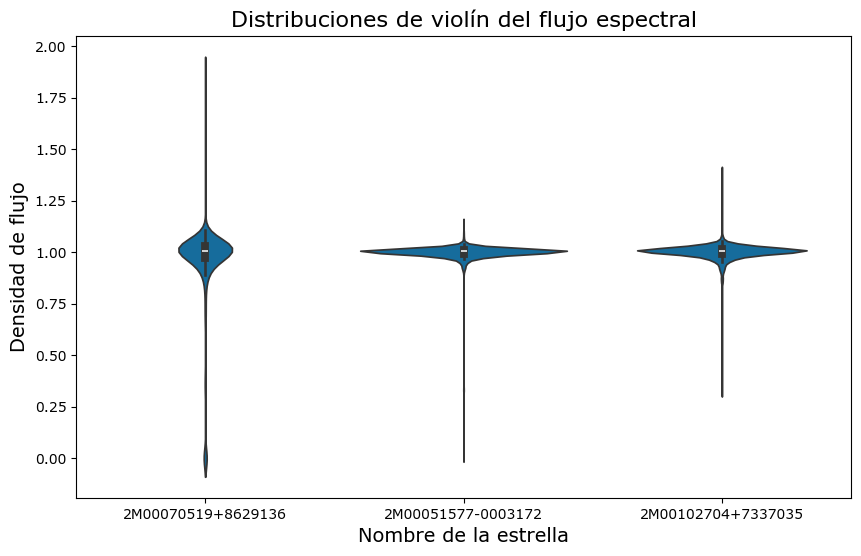

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ID', y='Density_flux', data=final_df)
# Set labels and title
plt.xlabel('Nombre de la estrella', fontsize=14)
plt.ylabel('Densidad de flujo', fontsize=14)
plt.title('Distribuciones de violín del flujo espectral', fontsize=16)

# Show plot
plt.show()

Se pueden apreciar diferencias significativas en los espectros de las estrellas.

Por un lado, el espectro de la estrella `2M00070519+8629136` está distribuido más equitativamente, teniendo una mayor concentración en valores entorno a \[0.8,1.25\].

Por otro lado, el espectro de la estrella `2M00051577-0003172` está concentrado de forma radical en valores muy cercanos al 1. Apenas muestra densidades de flujo mayores, pero sí muestra densidades de flujo menores.

Finalmente, el espectro de la estrella `2M00102704+7337035` está concentrado en menor medida en valores muy cercanos al 1 que la estrella `2M00051577-0003172`, aunque sí presenta valores superior en inferiores. En ningún caso muestra valores de flujo muy superiores ni muy inferiores.

Se puede concluir que estas tres estrellas son a nivel de espectro significativamente dispares, siendo más cercanas las estrellas `2M00102704+7337035` y `2M00051577-0003172`.



## Pregunta 2 - ¿Existe algún tipo de correlación entre las cantidades medibles de las estrellas que no sean las longitudes de onda respectivas a las densidades de flujo?

Para resolver esta pregunta, se debe graficar un mapa de calor representando la correlación entre todas las variables.

Para este tipo de gráfico, podemos hacer una visualización en tres dimensiones:
 1. El eje X representa cada una de las variables cuantificables de las estrellas.
 2. El eje Y representa cada una de las variables cuantificables de las estrellas.
 3. El color nos sirve para cuantificar la correlación. Como estas cantidades pueden ser inversamente proporcionales tanto de forma lineal como de forma no lineal, la escala estará comprendida entre \[-1,1\].
 4. Se necesitará comprender en el mismo gráfico tanto las correlaciones lineales (Spearman) como la correlación más general, lineal y no lineal, (Spearman).

In [14]:
df_corr=df[['T','logG','Fe/H','Spec_Type']]
df_dummies=pd.get_dummies(df_corr, columns=['Spec_Type'])
df_dummies=df_dummies.astype(float)
df_dummies

,T,logG,Fe/H,Spec_Type_Fd_a,Spec_Type_Fd_b,Spec_Type_Fd_c,Spec_Type_Fd_d,Spec_Type_GKd_a,Spec_Type_GKd_b,Spec_Type_GKd_c,...,Spec_Type_GKg_c,Spec_Type_GKg_d,Spec_Type_Md_a,Spec_Type_Md_b,Spec_Type_Md_c,Spec_Type_Md_d,Spec_Type_Mg_a,Spec_Type_Mg_b,Spec_Type_Mg_c,Spec_Type_Mg_d
0,5711.6045,4.400497,-0.001886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3723.2263,0.754881,-0.165732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5508.8604,4.305899,-0.285279,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6318.0450,3.857439,-0.168239,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6285.9190,3.836661,-0.178222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,4145.9110,4.833498,-0.009210,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1859,4393.4810,1.879430,-0.154772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860,3963.8252,0.983119,-0.247072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1861,4863.9480,2.793930,-0.261182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


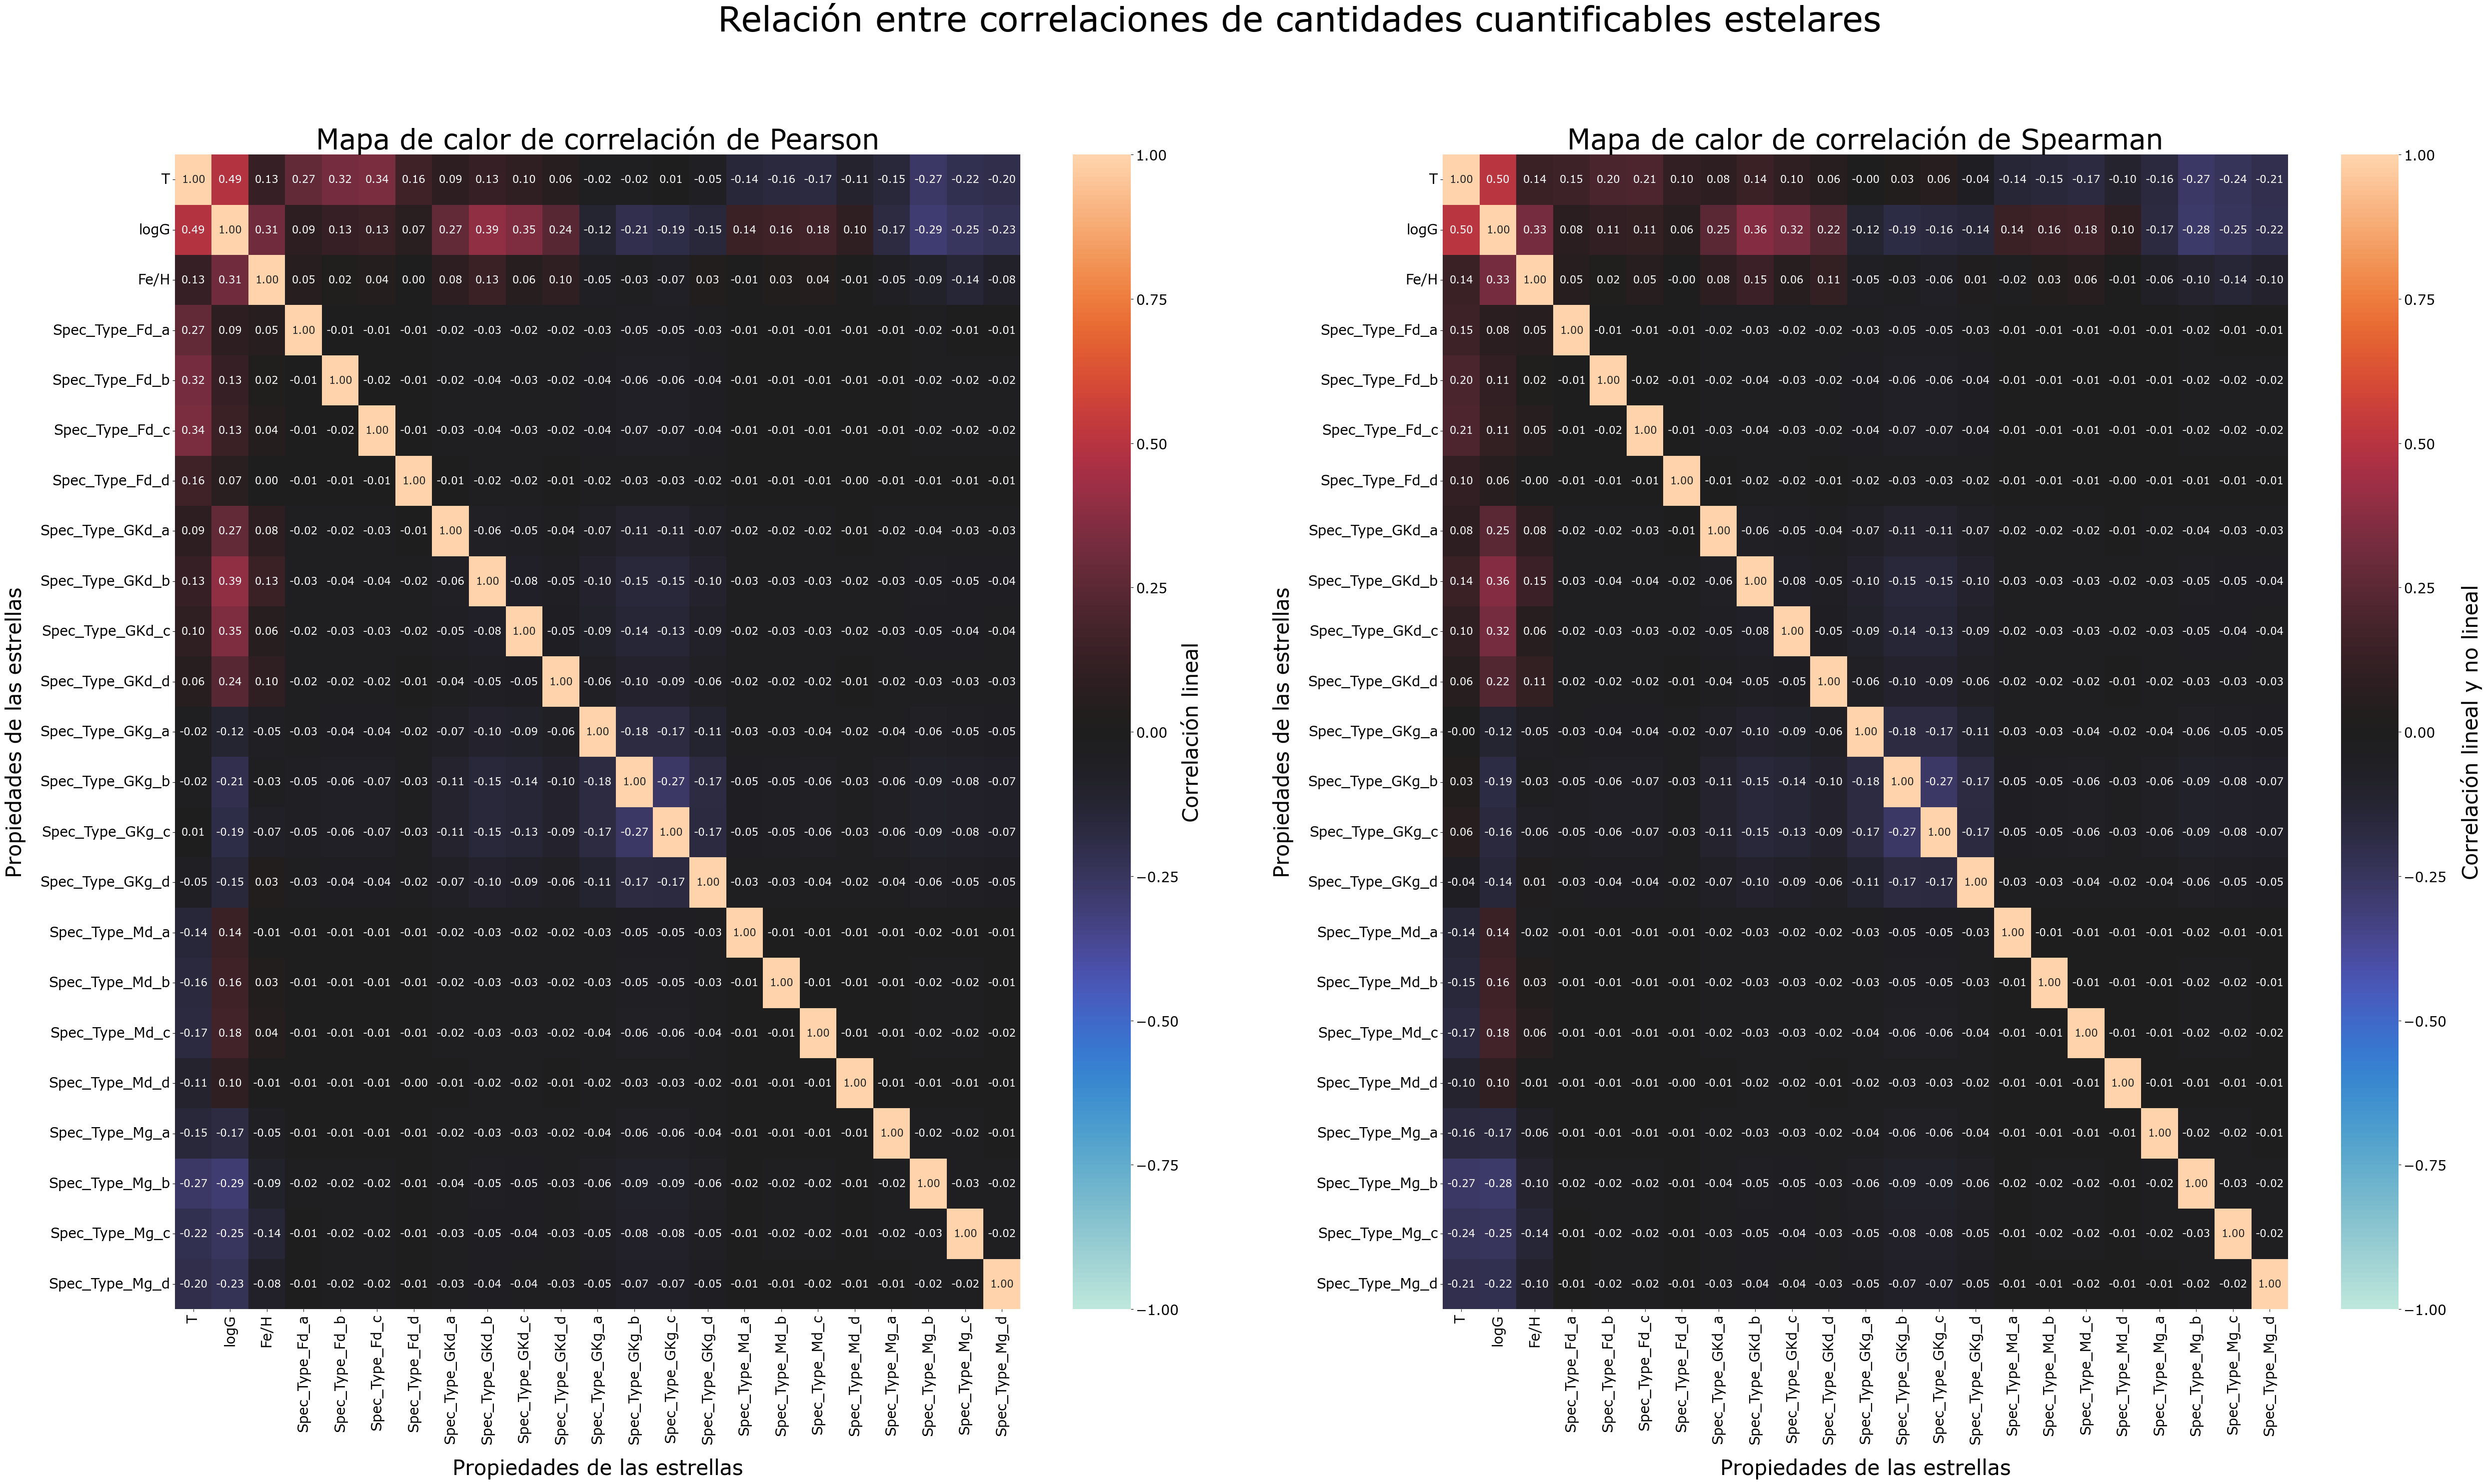

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(60, 30))
fig.suptitle('Relación entre correlaciones de cantidades cuantificables estelares', fontsize=50)
heatmap1=sns.heatmap(df_dummies.corr(), annot=True, fmt=".2f", ax=ax1, vmin=-1, vmax=1, center=0, annot_kws={'fontsize': 15})
ax1.set_title('Mapa de calor de correlación de Pearson', fontsize=40)
ax1.set_xlabel('Propiedades de las estrellas', fontsize=30, labelpad=20)
ax1.set_ylabel('Propiedades de las estrellas', fontsize=30, labelpad=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
cbar=heatmap1.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Correlación lineal', fontsize=30)

heatmap2=sns.heatmap(df_dummies.corr('spearman'), annot=True, fmt=".2f", ax=ax2, vmin=-1, vmax=1, center=0, annot_kws={'fontsize': 15})
ax2.set_title('Mapa de calor de correlación de Spearman', fontsize=40)
ax2.set_xlabel('Propiedades de las estrellas', fontsize=30, labelpad=20)
ax2.set_ylabel('Propiedades de las estrellas', fontsize=30, labelpad=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
cbar2=heatmap2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label('Correlación lineal y no lineal', fontsize=30, labelpad=20)


plt.show()

En general, para la mayoría de categorías estelares y propiedades cuantificables no existe ningún tipo de correlación ni lineal ni no lineal suficientemente considerable como para tenerse en cuenta. Sí es cierto que algunas variables presentan un tipo de correlación baja, de forma inversamente proporcional (valores cercanos a -0.3).

El único tipo de correlación que sí merece la pena estudiar es la presentada por la temperatura y gravedad superficial, ya que se observan valores entorno al 0.5, de forma directamente proporcional.

## Fuente de análisis 2

El preprocesamiento nos permite conocer las siguiente medidas normalizadas para el espectro óptico:
 - Metalicidad (ratio entre el número de átomos de hierro y de hidrógeno de una estrella medida contra los del sol) en escala logarítmica.
 - Temperatura efectiva medida en grados kelvin.
 - Tipo de espectro.
 - Gravedad de la superficie en unidades CGS en escala logarítmica \[cm^2/s\].
 - Densidad de flujo espectral \[erg/s/cm^2\]. En este caso, cada columna corresponde a la longitud de onda en la que se mide en Amstrongs \[Å\] (limitada entre 3.636 y 3.648). Asimismo, erg representa unidades de energía en la escala CGS. 

Asimismo, para continuar el storytelling y diferenciarlo del análisis anterior, puesto que se trabajan con las mismas variables pero con datos distintos, se aplican diagramas de visualización que miden características diferentes.

In [16]:
df=pd.read_parquet('data_opt_clean2.parquet')
df

,ID,Fe/H,T,Spec_Type,logG,3.636,3.6361,3.6362,3.6363,3.6364,...,3.647,3.6471,3.6472,3.6473,3.6474,3.6475,3.6476,3.6477,3.6478,3.6479
0,299493250387961856,-1.114146,8123.4950,A0,4.231899,0.727069,0.659317,0.698580,0.753081,0.674743,...,0.906805,0.920526,0.845230,0.824348,0.826020,0.900767,0.934351,0.823357,0.814464,0.881975
1,299497098678659072,0.022925,6082.7534,F2,3.811555,0.710345,0.673832,0.688650,0.774810,0.905492,...,0.781177,0.810640,0.878742,0.916780,0.959738,0.902997,0.834681,0.787898,0.783533,0.840650
2,299498198190286848,-0.956672,5824.9960,G2,3.762244,0.767890,0.745628,0.713973,0.716306,0.791205,...,0.870743,0.903982,0.911388,0.920946,0.981157,1.000000,0.974021,0.946377,0.872897,0.835844
3,299500672091449344,-0.086240,6894.1313,F5,4.002970,0.873480,0.830938,0.788394,0.822818,0.867128,...,0.887271,0.889910,0.929657,0.977077,1.000000,0.981194,0.943684,0.907632,0.870985,0.870356
4,299501771603077120,-2.075622,6292.1630,F5,3.642724,0.946972,0.927313,0.927848,0.939332,0.944542,...,0.966774,0.954011,0.966556,0.954604,0.941863,0.969388,0.972256,0.950652,0.959544,0.959670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,341301080740620288,-1.849987,6221.0640,F5,4.156362,0.905477,0.888953,0.885748,0.789810,0.883964,...,0.997850,0.927744,0.804459,0.882682,0.892951,0.909529,0.969194,0.921269,0.806400,0.848582
1996,341301905374341120,-3.019107,7884.9897,A0,4.578947,0.672500,0.643785,0.672370,0.674310,0.631987,...,0.688009,0.906237,0.809627,0.752261,0.754766,0.766054,0.791380,0.826180,0.838891,0.805125
1997,341318672926664704,-0.667613,4880.1084,K1,4.359947,0.273139,0.379541,0.629174,0.593026,0.612054,...,0.825460,0.761953,1.000000,0.856419,0.878209,0.874059,0.864708,0.652521,0.671238,0.798937
1998,341322796095268864,-0.780434,4688.5220,K3,4.380292,0.539221,0.456388,0.480276,0.515106,0.688722,...,0.729039,0.844097,0.760366,0.864989,1.000000,0.865137,0.791139,0.830425,0.686258,0.716761


## Pregunta 3 - ¿Cómo están distribuidos los valores de la densidad de flujo para las longitudes de onda comprendidas entre 3,636 y 3,6376 para todas las estrellas?

Para resolver esta pregunta, se debe graficar un gráfico de Ridgeline (crestas) representando la distribución de las longitudes de onda pedidas con los datos de todas las estrellas.

Para este tipo de gráfico, podemos hacer una visualización en tres dimensiones:
 1. El eje X los valores de la densidad de flujo.
 2. El eje Y representa cada una de las longitudes de onda.
 3. El área representa la magnitud de la cantidad de densidades concentradas en ciertos rangos numéricos.

In [17]:
start = 3.636
end = 3.6377
step = 0.0001

# Iterar sobre el rango y crear las cadenas
columns_to_be_included=[]
for value in np.arange(start, end, step):
    str_value=str(f"{value:.4f}")
    if '0' in str_value:
        columns_to_be_included.append(str(f"{value:.3f}"))
    else:
        columns_to_be_included.append(str_value)

columns_to_be_included[:-1]

['3.636',
 '3.6361',
 '3.6362',
 '3.6363',
 '3.6364',
 '3.6365',
 '3.6366',
 '3.6367',
 '3.6368',
 '3.6369',
 '3.637',
 '3.6371',
 '3.6372',
 '3.6373',
 '3.6374',
 '3.6375',
 '3.6376']

In [18]:
df_ridge=df[columns_to_be_included[:-1]]
df_ridge.columns=[f"wv_{col}" for col in df_ridge.columns]
df_ridge

,wv_3.636,wv_3.6361,wv_3.6362,wv_3.6363,wv_3.6364,wv_3.6365,wv_3.6366,wv_3.6367,wv_3.6368,wv_3.6369,wv_3.637,wv_3.6371,wv_3.6372,wv_3.6373,wv_3.6374,wv_3.6375,wv_3.6376
0,0.727069,0.659317,0.698580,0.753081,0.674743,0.633941,0.656364,0.648178,0.588353,0.566595,0.596623,0.677275,0.582684,0.532623,0.535067,0.499694,0.455032
1,0.710345,0.673832,0.688650,0.774810,0.905492,0.914358,0.889017,0.873631,0.889535,0.933426,0.894738,0.831004,0.811022,0.692836,0.656351,0.584794,0.508268
2,0.767890,0.745628,0.713973,0.716306,0.791205,0.850215,0.882554,0.863259,0.830942,0.888026,0.878717,0.906924,0.842993,0.844842,0.787226,0.693348,0.581047
3,0.873480,0.830938,0.788394,0.822818,0.867128,0.889608,0.874946,0.850153,0.844272,0.834272,0.816400,0.799892,0.745905,0.676319,0.597332,0.517434,0.432352
4,0.946972,0.927313,0.927848,0.939332,0.944542,0.925836,0.899440,0.937750,0.915445,0.877758,0.933016,0.923429,0.906390,0.905143,0.881151,0.861881,0.855499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.905477,0.888953,0.885748,0.789810,0.883964,0.945556,0.958819,0.899542,0.871308,0.936212,0.843945,0.837132,0.881598,0.847347,0.789578,0.755363,0.660518
1996,0.672500,0.643785,0.672370,0.674310,0.631987,0.796845,0.785506,0.738450,0.662871,0.532127,0.584765,0.513148,0.520344,0.502559,0.441403,0.490019,0.412036
1997,0.273139,0.379541,0.629174,0.593026,0.612054,0.735162,0.578714,0.681130,0.790267,0.751519,0.777473,0.762905,0.555816,0.454673,0.480266,0.539066,0.710979
1998,0.539221,0.456388,0.480276,0.515106,0.688722,0.826753,0.747001,0.768579,0.802117,0.793950,0.605778,0.817848,0.717221,0.806969,0.711816,0.505417,0.538180


In [19]:
df_ridge_melted=pd.melt(df_ridge, value_vars=df_ridge.columns, var_name='Wave_length',value_name='Density_flux')
df_ridge_melted

,Wave_length,Density_flux
0,wv_3.636,0.727069
1,wv_3.636,0.710345
2,wv_3.636,0.767890
3,wv_3.636,0.873480
4,wv_3.636,0.946972
...,...,...
33910,wv_3.6376,0.660518
33911,wv_3.6376,0.412036
33912,wv_3.6376,0.710979
33913,wv_3.6376,0.538180


In [20]:
fig=go.Figure()
wave_lengths=df_ridge_melted['Wave_length'].unique()

for i, wave_length in enumerate(wave_lengths):
    subset=df_ridge_melted[df_ridge_melted['Wave_length']==wave_length]
    kde=gaussian_kde(subset['Density_flux'])
    x_range=np.linspace(subset['Density_flux'].min(), subset['Density_flux'].max(), 1000)
    kde_values=kde(x_range)
    fig.add_trace(go.Scatter(x=x_range, y=kde_values+i*4, mode='lines', name=wave_length,  fill="toself"))

fig.update_layout(title=dict(text="Distribución de densidad de flujo para longitudes de onda",x=0.5,xanchor="center",font=dict(size=30)), xaxis=dict(title=dict(text="Densidad de flujo",font=dict(size=18))),
        yaxis=dict(
            title=dict(text="Longitudes de onda",font=dict(size=18)),
            tickvals=[i*4  for i in range(len(wave_lengths))],
            ticktext=[str(wl) for wl in wave_lengths],
        ), showlegend=False)

Se puede apreciar que las distribuciones para los valores comprendidos entre las longitudes de onda \[3.636,3.6372\] tienen una distribución similar en su densidad de flujo. 

No obstante, a partir de la longitud de onda 3.6373, esta distribución se desplaza a una distribución de carácter más normal y platicúrtica que el resto, para valores centrales de la densidad de flujo.

Esto nos permite ver que la densidad de flujo del espesctro óptico no está distribuida de la misma manera. Por tanto, se puede afirmar que esta densidad depende del valor de la longitud de onda en el que se mida.

## Pregunta 4 - Cada medida de cada estrella en el espectro óptico está asociada con una categoría. ¿Qué categoría es la más abundante y en qué proporción con respecto al resto?

Para responder a esta pregunta, se debe graficar un gráfico de Waffle. En este se presenta de forma ordenada y conjunta las diversas estrellas que pertenencen a una categoría en forma matricial, la cantidad de elementos nos aporta una dimensión (magnitud) y el color nos indica la categoría a la que pertenecen. El tipo de gráfico a dibujar son elipses.

Para este tipo de gráfico, podemos hacer una visualización en dos dimensiones:
 1. El eje Z representa cada una de las categorías
 2. El número de puntos coloreados da una sensación de magnitud y se le atribuye otra dimensión.

In [21]:
df_grouped=df.groupby('Spec_Type').size().reset_index(name='Counts')
series_grouped=df.groupby('Spec_Type').size()
total_stars=df_grouped['Counts'].sum()
series_zip=series_grouped.items()
series_grouped

Spec_Type
00                        2
A0                      825
A0p                       5
B6                        4
B9                        1
F2                       90
F5                      454
F9                      199
G0                       88
G2                      129
K1                       37
K3                       46
K5                       49
K7                       17
M0                        4
M3                        1
M7                        2
OB                        1
STARFORMING               1
WD                       40
dtype: int64

In [22]:
n_columns=20
custom_palette =  plt.cm.tab20.colors
colors=[]
count=0
for group, count in series_zip:
    idx=series_grouped.index.get_loc(group)
    colors.extend([custom_palette[idx]]*count)
    count+=1

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

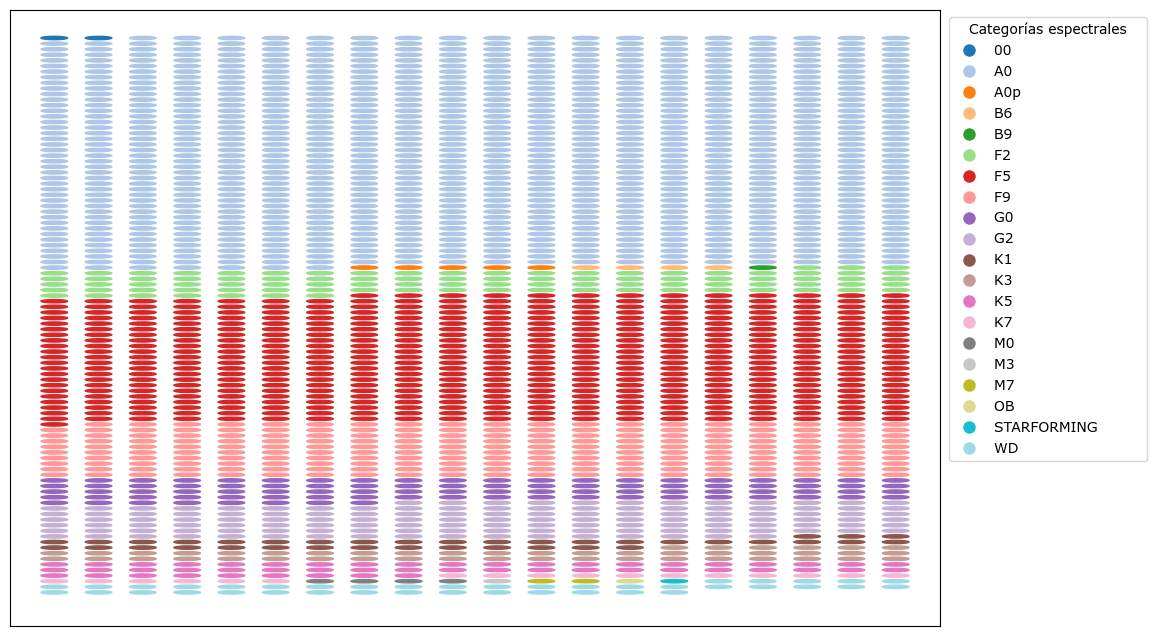

In [23]:
fig, ax= plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 100)
ax.set_ylim(0,20)
for idx, color in enumerate(colors):
    row= idx//n_columns
    col= idx % n_columns
    print(row,col)
    ax.add_patch(plt.Circle((col, -row), radius=0.3, color=color))

# ax.add_patch(plt.Rectangle((20, 20), 0.1, 0.1, color="blue"))
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1, n_columns)
ax.set_ylim(-((len(colors) - 1) // n_columns + 1)-5,5)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=group)
           for i, group in enumerate(series_grouped.index)]
ax.legend(handles=handles, title="Categorías espectrales", loc='upper right',bbox_to_anchor=(1.23, 1))

Se puede ver como el tipo más abundante es el tipo A0, seguido del F5.

Hay al menos 4 categorías espectrales que son mucho más abundantes que el resto, estas son: A0, F5, F9 y G2.

De la categoría espectral STARFORMING solo se encuentra una muestra y lo mismo ocurre con la categoría M3.

Claramente, las categorías están notablemente desbalanceadas entre sí.